### <center>CSIS 452 - Applied Machine Learning</center>
## Assignment 3 - due: 3/12/2020
In this assignment you will experiment with linear regression and generalization concepts using attached decay-rate data set.  <p><i>Please ignore any <b>FutureWarnings</b> warnings when you run your code.</i></p>

Enter your name as a comment in the cell below

Developer: Brady Lange

Date: 03/01/2020

Description: Temperature decay rate analysis with Linear Regression and Generalization.

Course: Applied Machine Learning (CSIS 452)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.model_selection import train_test_split

6


The decay rate data set has three attributes (<b>pressure, temperature, rate-of-decay)</b>.  The objective is to predict rate-of-decay based on values of pressure and temperature.  

Let's first retrieve the data and extract <b>X</b> and <b>y</b> from it.

In [2]:
data_set = pd.read_csv("decay_rate.csv")
X = np.array(data_set.drop(["rate-of-decay"], axis = 1))
y = np.array(data_set[["rate-of-decay"]])

print("Shape of X: \t", X.shape)
print("Shape of y: \t", y.shape)
print(X[0, :])
print(y[0, :])

Shape of X: 	 (1000, 2)
Shape of y: 	 (1000, 1)
[4.09839746 6.5585182 ]
[0.30537107]


## Expected output
Shape of X: 	 (1000, 2)

Shape of y: 	 (1000, 1)

[ 4.09839746  6.5585182 ]

[ 0.30537107]

Now let's normalize X.

In [3]:
#YOUR CODE STARTS HERE
scaler = StandardScaler()
scaler.fit(X)
normalized_X = scaler.transform(X)

#YOUR CODE ENDS HERE
print("Shape of Normalized X:\t", normalized_X.shape)
print(normalized_X[0, :])

Shape of Normalized X:	 (1000, 2)
[-0.29391077 -1.53446589]


## Expected output
Shape of Normalized X:	 (1000, 2)

[-0.29391077 -1.53446589]

Now that we have preprocessed X, it is time to put aside a test set.  Use train_test_split function to generate X_train, X_test, y_train, y_test.  You must make sure that the data is shuffled prior to split. Set the random seed to 3 for shuffling.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.1, random_state = 3, shuffle = true)
print("Shape of X_train: \t", X_train.shape)
print("Shape of y_train: \t", y_train.shape)
print("Shape of X_test: \t", X_test.shape)
print("Shape of y_test: \t", y_test.shape)

Shape of X_train: 	 (900, 2)
Shape of y_train: 	 (900, 1)
Shape of X_test: 	 (100, 2)
Shape of y_test: 	 (100, 1)


## Expected output
Shape of X_train: 	 (900, 2)

Shape of y_train: 	 (900, 1)

Shape of X_test: 	 (100, 2)

Shape of y_test: 	 (100, 1)

We will need to now extract a validation set from the training set.  Use the train_test_split method to break the training set into a new training set and a validation set.  Validation set should be 20% of the original training set.  Since X_train is already shuffled, in the interest of efficiency, now let's make sure no further shuffling will take place.  We will maintain the full train_set in new variable X_train_val_combined and y_train_val_combined.

In [5]:
X_train_val_combined = X_train
y_train_val_combined = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)
print("Shape of X_train: \t", X_train.shape)
print("Shape of X_val: \t", X_val.shape)
print("Shape of y_train: \t", y_train.shape)
print("Shape of y_val: \t", y_val.shape)

Shape of X_train: 	 (720, 2)
Shape of X_val: 	 (180, 2)
Shape of y_train: 	 (720, 1)
Shape of y_val: 	 (180, 1)


## Expected output
Shape of X_train: 	 (720, 2)

Shape of X_val: 	 (180, 2)

Shape of y_train: 	 (720, 1)

Shape of y_val: 	 (180, 1)

Let's train a linear regression model using Stochastic Gradient Descent experiment with different learning rates (Use a random seed of 1 for model construction).  Write a for loop that would train an SGDRegressor using Max_iter of 1000 and learning rates of 0.0001, 0.001, 0.01, 0.1, 1, and 10.  The code should produce the learning rate used, the MSE on training and MSE on validation for each learning rate.  The code should also maintain these errors so that they can be plotted once the loop is done.  Feel Free to experiment with other learning rates, but please only report for the specified learning rates.

lr: 0.0001; MSE_train: 0.2721, MSE_val: 0.2939

lr: 0.001; MSE_train: 0.0196, MSE_val: 0.0245

lr: 0.01; MSE_train: 0.0112, MSE_val: 0.0132

lr: 0.1; MSE_train: 0.0112, MSE_val: 0.0130

lr: 1; MSE_train: 0.0145, MSE_val: 0.0165

lr: 10; MSE_train: 790373140510625927004160.0000, MSE_val: 767019999448507455897600.0000



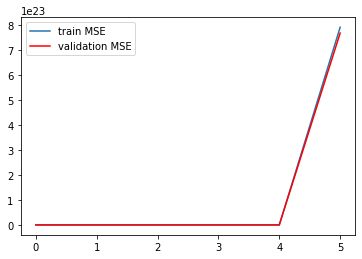

In [6]:
max_iterations = 1000
MSE_train = []
MSE_val = []
for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    linear_regression_model = SGDRegressor(penalty = 'l2', eta0 = learning_rate, 
                                           max_iter = max_iterations, random_state = 1)
    linear_regression_model.fit(X_train, y_train.ravel())
    h_train = linear_regression_model.predict(X_train)
    h_val = linear_regression_model.predict(X_val)
    mse_train = mean_squared_error(y_train, h_train)
    MSE_train.append(mse_train)
    mse_val = mean_squared_error(y_val, h_val)
    MSE_val.append(mse_val)
    print("lr: {0}; MSE_train: {1:.4f}, MSE_val: {2:.4f}\n".format(linear_regression_model.eta0, 
                                                                   mse_train, mse_val))

plt.plot(MSE_train, label="train MSE")
plt.plot(MSE_val, 'r', label="validation MSE")
plt.legend()
plt.show()

## Expected output
<img src="Figure1.png" width="40%" height="40%">

Identify the best learning rate from the experiment you ran in the last step.  Use this learning rate to train a linear regression model with Stochastic Gradient Descent on the data that is composed of all samples from the training set and  validation set combined.  Use a random seed of 1 for model construction.

In [7]:
best_lr = min(MSE_val)
linear_regression_model = SGDRegressor(penalty = 'l2', eta0 = best_lr, random_state = 1)
linear_regression_model.fit(X_train_val_combined, y_train_val_combined.ravel())
h_test = linear_regression_model.predict(X_test)
print(mean_squared_error(y_test, h_test))

0.010369701076552884


## Expected output
0.0102556838767

Although the resulting MSE is good, let's see if we could do better.  Produce the learning curves for the model. Use a random seed of 1 for model construction. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    for m in range(5, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        h_train = model.predict(X_train[:m])
        h_val = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], h_train[:m]))
        val_errors.append(mean_squared_error(y_val, h_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")

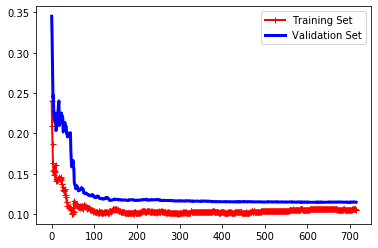

In [9]:
linear_regression_model = SGDRegressor(penalty = 'l2', eta0 = best_lr, random_state = 1)
plot_learning_curves(linear_regression_model, X_train, y_train.ravel(), X_val, y_val)
plt.legend()
plt.show()

## Expected output
<img src="Figure2.png" width="40%" height="40%">

You should be able to see that the training and validation MSE converge very quickly and then remains steady.  This indicates a possible bias issue.  Let's see if the error improves if we can make the model more flexible.  Train the model using a polynomial of degree 30 and measure the performance.

Lets start with the original data set X and y and preprocess using the following steps :

a) Generate the polynomial features and assign the results in X_poly.

b) Normalize the new data using StandardScaler

c) Split X and y to train, test and validation as we did earlier. Set the random seed to 2 for shuffling.


In [10]:
#Step a: Generate the polynomial features and assign the results in X_poly
poly_features = PolynomialFeatures(degree = 30, include_bias = False)
X_poly = poly_features.fit_transform(X)
print("Shape of X_poly: \t", X_poly.shape)

#Step b: Normalize
scaler = StandardScaler()
scaler.fit(X_poly)
normalized_X_poly = scaler.transform(X_poly)
print("Shape of Normalized X:\t", normalized_X_poly.shape)

#Step C: Generate train, test and validation sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(normalized_X_poly, y, test_size = 0.1)
print("Shape of X_train_poly: \t", X_train_poly.shape)
print("Shape of y_train: \t", y_train.shape)
print("Shape of X_test_poly: \t", X_test_poly.shape)
print("Shape of y_test: \t", y_test.shape)

X_train_val_poly_combined = X_train_poly
y_train_val_combined = y_train
X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_train_val_poly_combined, 
                                                            y_train_val_combined, 
                                                            test_size = 0.20)
print("Shape of X_train: \t", X_train_poly.shape)
print("Shape of X_val: \t", X_val_poly.shape)
print("Shape of y_train: \t", y_train.shape)
print("Shape of y_val: \t", y_val.shape)

Shape of X_poly: 	 (1000, 495)
Shape of Normalized X:	 (1000, 495)
Shape of X_train_poly: 	 (900, 495)
Shape of y_train: 	 (900, 1)
Shape of X_test_poly: 	 (100, 495)
Shape of y_test: 	 (100, 1)
Shape of X_train: 	 (720, 495)
Shape of X_val: 	 (180, 495)
Shape of y_train: 	 (720, 1)
Shape of y_val: 	 (180, 1)


## Expected output
Shape of X_poly: 	 (1000, 495)

Shape of Normalized X:	 (1000, 495)

Shape of X_train_poly: 	 (900, 495)

Shape of y_train: 	 (900, 1)

Shape of X_test_poly: 	 (100, 495)

Shape of y_test: 	 (100, 1)

Shape of X_train: 	 (720, 495)

Shape of X_val: 	 (180, 495)

Shape of y_train: 	 (720, 1)

Shape of y_val: 	 (180, 1)


Let's train a linear regression model using Stochastic Gradient Descent experiment with different learning rates on the new data set.  Write a for loop that would train an SGDRegressor using Max_iter of 1000 and learning rates of 0.00001, 0.00003, 0.0001, 0.0003, 0.001.  The code should produce the learning rate used, the MSE on training and MSE on validation for each learning rate.  The code should also maintain these errors so that they can be plotted once the loop is done.  Feel Free to experiment with other learning rates, but please only report for the specified learning rates. Use a random seed of 1 for model construction.

lr: 1e-05; MSE_train: 1.5744, MSE_val: 1.5735

lr: 3e-05; MSE_train: 0.8629, MSE_val: 0.8907

lr: 0.0001; MSE_train: 0.2588, MSE_val: 0.2555

lr: 0.0003; MSE_train: 0.0678, MSE_val: 0.0664

lr: 0.001; MSE_train: 0.0160, MSE_val: 0.0245



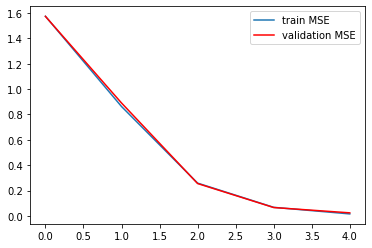

In [11]:
max_iterations = 1000
MSE_train = []
MSE_val = []
for learning_rate in [0.00001, 0.00003, 0.0001, 0.0003, 0.001]:
    poly_regression_model = SGDRegressor(penalty = 'l2', eta0 = learning_rate, 
                                         max_iter = max_iterations, random_state = 1)
    poly_regression_model.fit(X_train_poly, y_train.ravel())
    h_train = poly_regression_model.predict(X_test_poly)
    h_val = poly_regression_model.predict(X_val_poly)
    mse_train = mean_squared_error(y_test, h_train)
    MSE_train.append(mse_train)
    mse_val = mean_squared_error(y_val, h_val)
    MSE_val.append(mse_val)
    print("lr: {0}; MSE_train: {1:.4f}, MSE_val: {2:.4f}\n".format(learning_rate, mse_train, mse_val))

plt.plot(MSE_train, label="train MSE")
plt.plot(MSE_val, 'r', label="validation MSE")
plt.legend()
plt.show()

## Expected output
<img src="Figure3.png" width="40%" height="40%">

Identify the best learning rate from the experiment you ran in the last step.  Use this learning rate to train a linear regression model with Stochastic Gradient Descent on the data that is composed of all samples from the training set and validation set combined. Use a random seed of 1 for model construction.

In [12]:
best_lr = min(MSE_val)
ploy_regression_model = SGDRegressor(penalty = 'l2', eta0 = best_lr, random_state = 1)
ploy_regression_model.fit(X_train_val_poly_combined, y_train_val_combined.ravel())
h_test = poly_regression_model.predict(X_test_poly)
print(mean_squared_error(y_test, h_test))

0.016004925648125487


## Expected output
0.00313735829305

The resulting MSE is much better now, let's see if we could do even better.  Produce the learning curves for the polynomial model.  Use a random seed of 1 for model construction. 

This may take a while to run, so move on to something else and come back in about 1/2 hour.  

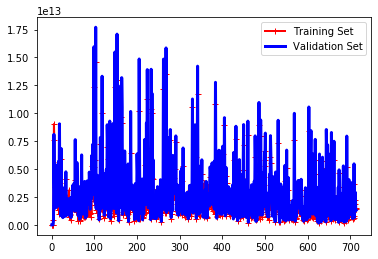

In [13]:
poly_regression_model = SGDRegressor(penalty = 'l2', eta0 = best_lr, random_state = 1)
plot_learning_curves(poly_regression_model, X_train_poly, y_train.ravel(), X_val_poly, y_val)
plt.legend()
plt.show()

## Expected output
<img src="Figure4.png" width="40%" height="40%">

You should be able to see improvement in MSE.  You should also observe that the training and validation MSE converge over time and that the validation error improves somewhat as new training samples are added.  This indicate a possible variance issue.  Let's see if the error improves if we make the model less flexible through regularization.  

Train ridge regression model on the same poly datasets.  Use the best learning rate discovered in your poly experiment.   Write a for loop to experiment with regularization parameters of 0.0001, 0.001, 0.01, 0.1, 0.2. The code should produce the regularization value that was used, the MSE on training and MSE on validation for each regularization value. Feel Free to experiment with other regularization values, but please only report for the specified values. Use a random seed of 1 for model construction. 

alpha: 0.0001, MSE_train: 0.0034, MSE_val: 0.0030

alpha: 0.001, MSE_train: 0.0034, MSE_val: 0.0029

alpha: 0.01, MSE_train: 0.0033, MSE_val: 0.0028

alpha: 0.1, MSE_train: 0.0030, MSE_val: 0.0026

alpha: 0.2, MSE_train: 0.0029, MSE_val: 0.0026



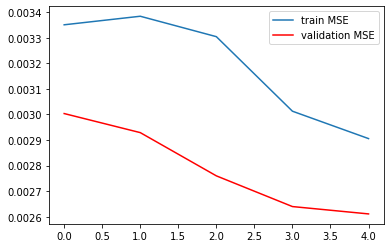

In [14]:
MSE_train = []
MSE_val = []
for regularization_param in [0.0001, 0.001, 0.01, 0.1, 0.2]:
    ridge_regression_model = Ridge(alpha = regularization_param, random_state = 1)
    ridge_regression_model.fit(X_train_poly, y_train.ravel())
    h_train = ridge_regression_model.predict(X_test_poly)
    h_val = ridge_regression_model.predict(X_val_poly)
    mse_train = mean_squared_error(y_test, h_train)
    MSE_train.append(mse_train)
    mse_val = mean_squared_error(y_val, h_val)
    MSE_val.append(mse_val)
    print("alpha: {0}, MSE_train: {1:.4f}, MSE_val: {2:.4f}\n".format(regularization_param, mse_train, mse_val))

plt.plot(MSE_train, label="train MSE")
plt.plot(MSE_val, 'r', label="validation MSE")
plt.legend()
plt.show()

## Expected output
<img src="Figure5.png" width="40%" height="40%">

Identify the best regularization parameters from the experiment you ran in the last step.  Use this learning rate to train a ridge regression model with Stochastic Gradient Descent on the data that is composed of all samples from the training set and validation set combined. Use a random seed of 1 for model construction. 

In [15]:
best_alpha = min(MSE_val)
ridge_regression_model = SGDRegressor(penalty = 'l2', eta0 = best_alpha, random_state = 1)
ridge_regression_model.fit(X_train_val_poly_combined, y_train_val_combined.ravel())
h_test = ridge_regression_model.predict(X_test_poly)
print(mean_squared_error(y_test, h_test))

5.685115052438028e+21


## Expected output
0.0031429175403844727

Did regularization help?  Explain.

In [ ]:
No.